In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data= pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [5]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

Information on the features or attributes The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction. The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable Securities Account - Does the customer have a securities account with the bank? CD Account - Does the customer have a certificate of deposit (CD) account with the bank? Online - Does the customer use internet banking facilities? Credit Card - Does the customer use a credit card issued by UniversalBank? Interval variables are as below:

Age - Age of the customer Experience - Years of experience Income - Annual income in dollars CCAvg - Average credit card spending Mortage - Value of House Mortgage Ordinal Categorical Variables are:

Family - Family size of the customer Education - education level of the customer The nominal variable is :

ID Zip Code

In [4]:
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# No columns have null data in the file
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

All of the columns have numerical data and there are no missing values.

In [7]:
# Eye balling the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#finding unique data
data.apply(lambda x: len(x.unique()))


# Exploring the age column

In [8]:
data['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

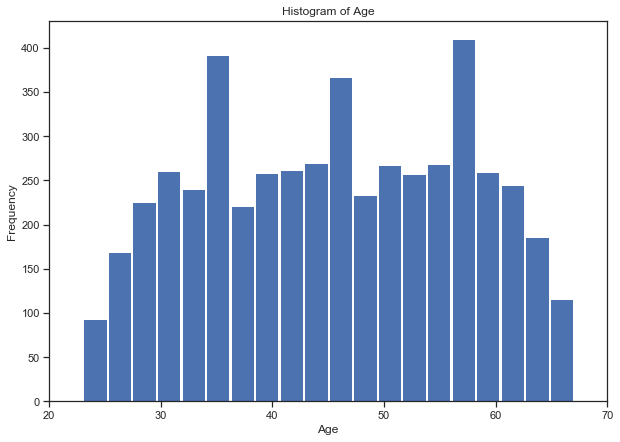

In [9]:
plt.figure(figsize=(10,7))
plt.hist(data['Age'],bins=20,rwidth=0.95)
plt.xlim(20,70)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

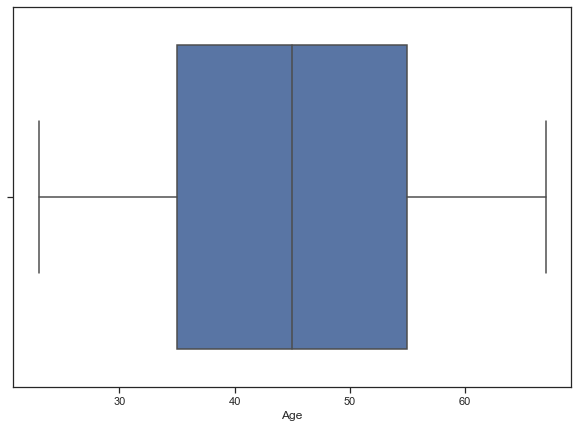

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(data['Age'])
plt.show()

 It can be observed that age is more or less symmetrically distributed and most of the customers fall in between the range of 30 to 60 years. There is no skewness in the distribution of age.

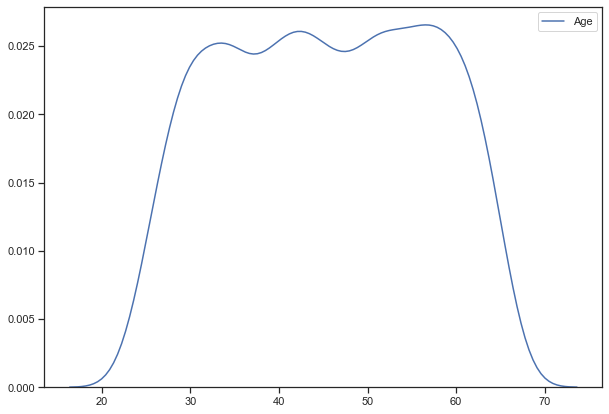

In [11]:
plt.figure(figsize=(10,7))
sns.kdeplot(data['Age'])
plt.show()

We can also see that the distribution is multi-modal with 3 peaks.

# Exploring experience

In [12]:
data['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [ ]:
# The minimum value in experience is -3 which doesn't make sense as years of experience of a customer cannot be less than 0.
# We can look at how many such points exist.

In [13]:
np.sum([data['Experience'] < 0])

52

In [14]:
data[data['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [15]:
data[data['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIPCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
PersonalLoan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


We can see that Age group of the customers with negative years of experience is between 23 and 29 years.

The dataset also contains 52 customers with negative years of experience. As the dataset has 5000 values and only 52 have negative years of experience, we can drop these records from our dataset for analysis.

In [16]:
# Filtering out the records with Experience less than 0.
data = data[data['Experience'] >= 0]

# Exploring the Annual income of our customers

In [19]:
data['Income'].describe()

count    4948.000000
mean       73.814470
std        46.112596
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

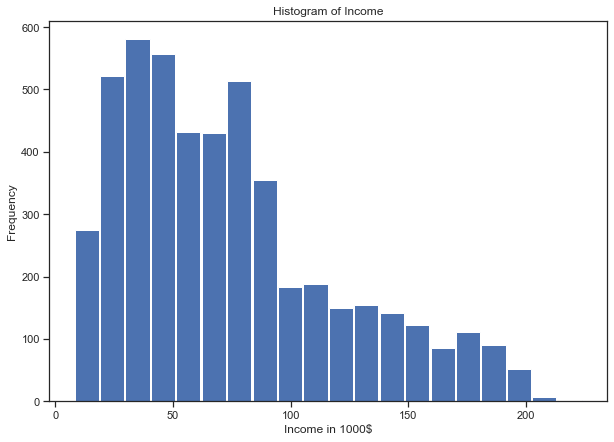

In [20]:
plt.figure(figsize=(10,7))
plt.hist(data['Income'],bins=20,rwidth=0.95)
#plt.xlim(20,70)
plt.xlabel('Income in 1000$')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

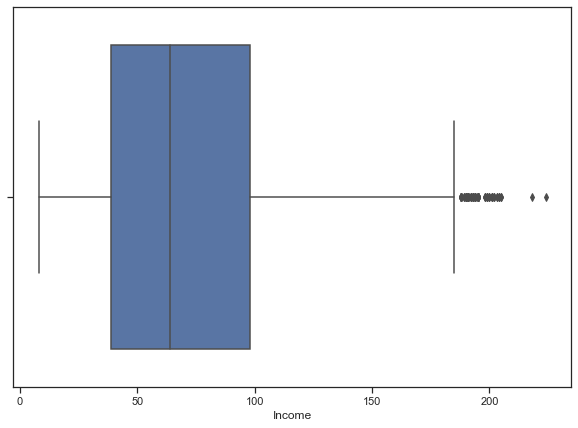

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(data['Income'])
plt.show()

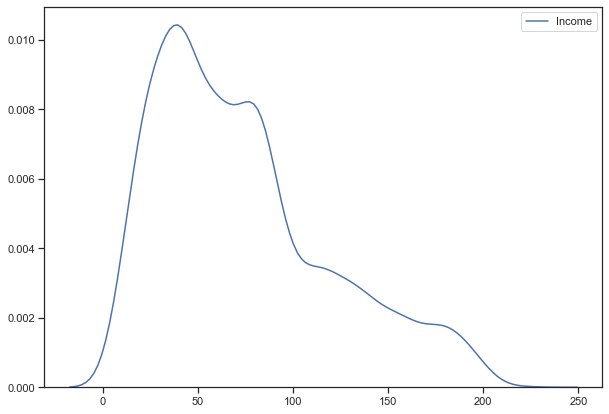

In [22]:
plt.figure(figsize=(10,7))
sns.kdeplot(data['Income'])
plt.show()

The distribution of income is clearly right skewed. Most of our customers have an income in the range of approx. 15000 dollars to 10000 dollars. The boxplot also shows some outliers whose income is greater than 180000 $. These are very few records.

# Exploring Family size 

In [23]:
data['Family'].describe()

count    4948.000000
mean        2.391471
std         1.148444
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

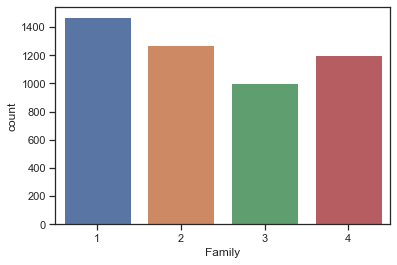

In [24]:
sns.countplot(data['Family'])

It can be seen that most of our customers are single. The distribution of the various family sizes is approximately even with a family size of 3 members being the least in number.

In [25]:
pd.crosstab(columns=data['PersonalLoan'],index=data['Family'])

PersonalLoan,0,1
Family,,
1,1363,107
2,1168,106
3,868,133
4,1069,134


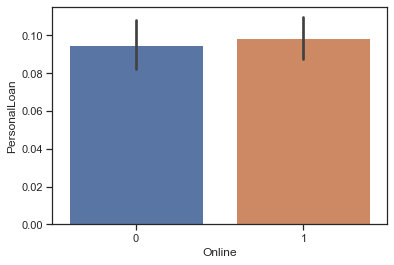

In [36]:
sns.barplot(x=data['Online'],y=data['PersonalLoan'])
plt.show()

# exploring education


In [26]:
data['Education'].describe()

count    4948.000000
mean        1.878941
std         0.839745
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

In [27]:
data['Education'].value_counts()

1    2080
3    1481
2    1387
Name: Education, dtype: int64

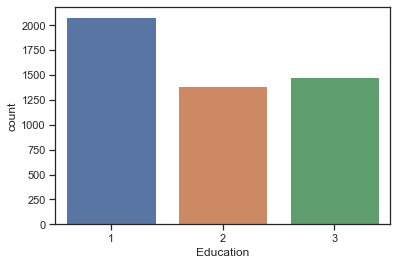

In [28]:
sns.countplot(data['Education'])

In [29]:
pd.crosstab(columns=data['PersonalLoan'],index=data['Education'])

PersonalLoan,0,1
Education,,
1,1987,93
2,1205,182
3,1276,205


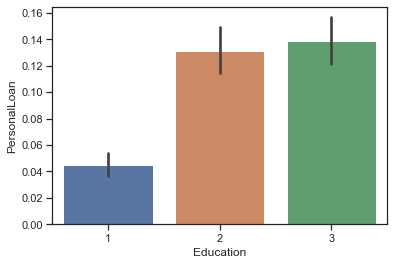

In [30]:
sns.barplot(x=data['Education'],y=data['PersonalLoan'])


We can see that as most of the Personal loans have been taken by advanced degree holders and graduates.


# Exploring mortgage

In [31]:
data['Mortgage'].describe()

count    4948.000000
mean       56.634398
std       101.828885
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

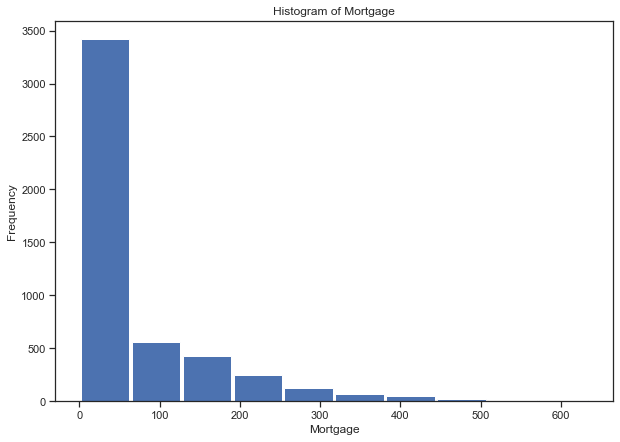

In [32]:

plt.figure(figsize=(10,7))
plt.hist(data['Mortgage'],rwidth=0.95)
#plt.xlim(20,70)
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.title('Histogram of Mortgage')
plt.show()

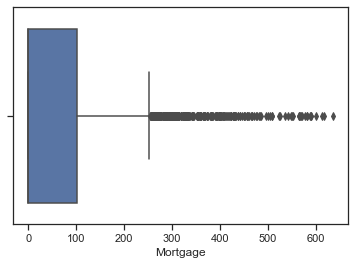

In [33]:
sns.boxplot(data['Mortgage'])
plt.show()


Again the boxplot clearly indicates that the distribution is very skewed to the right.

# Exploring Securities Account

In [34]:
data['SecuritiesAccount'].describe()

count    4948.000000
mean        0.104285
std         0.305660
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SecuritiesAccount, dtype: float64

In [35]:
data['SecuritiesAccount'].value_counts()

0    4432
1     516
Name: SecuritiesAccount, dtype: int64

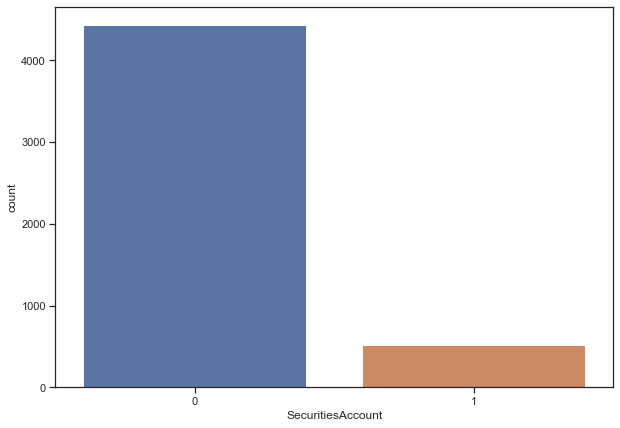

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(data['SecuritiesAccount'])
plt.show()

The distribution of Securities Account clearly shows that most of our customers do not have a securities account.

In [37]:
pd.crosstab(columns=data['PersonalLoan'],index=data['SecuritiesAccount'])


PersonalLoan,0,1
SecuritiesAccount,,
0,4012,420
1,456,60


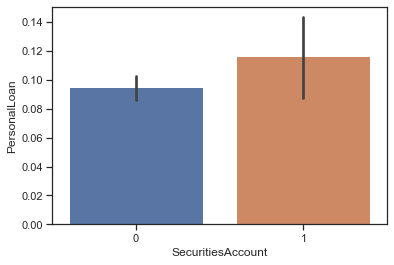

In [38]:
sns.barplot(x=data['SecuritiesAccount'],y=data['PersonalLoan'])


We can see that the probability of taking a personal loan is a little higher for a customer with a securities account

# Exploring CD(Certificate of Deposit) account 

In [39]:
data['CDAccount'].describe()

count    4948.000000
mean        0.061035
std         0.239418
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CDAccount, dtype: float64

In [40]:
data['CDAccount'].value_counts()

0    4646
1     302
Name: CDAccount, dtype: int64

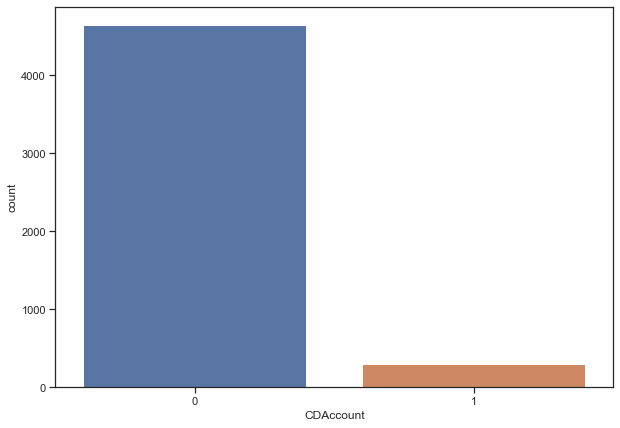

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(data['CDAccount'])
plt.show()


Most of our customers do not have a Certificate of Deposit Account

In [42]:
pd.crosstab(index=data['CDAccount'],columns=data['PersonalLoan'])

PersonalLoan,0,1
CDAccount,,
0,4306,340
1,162,140


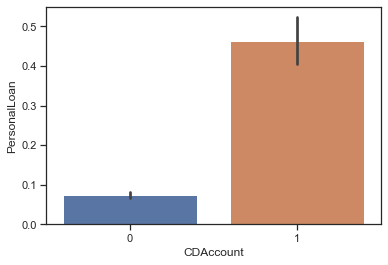

In [43]:
sns.barplot(x=data['CDAccount'],y=data['PersonalLoan'])
plt.show()

The probability of a customer to take a personal loan with a CD account is higher than a customer without a CD account.

#  Exploring Online

In [44]:
data['Online'].describe()

count    4948.000000
mean        0.597009
std         0.490549
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Online, dtype: float64

In [45]:
data['Online'].value_counts()

1    2954
0    1994
Name: Online, dtype: int64

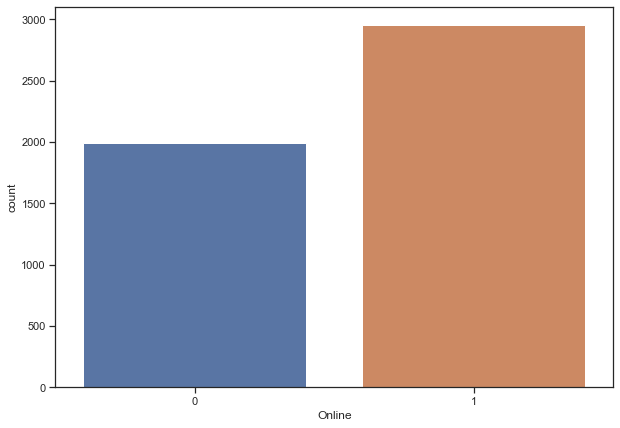

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(data['Online'])
plt.show()


We can see that most of our customers use online banking services.

In [47]:
pd.crosstab(index=data['Online'],columns=data['PersonalLoan'])

PersonalLoan,0,1
Online,,
0,1805,189
1,2663,291


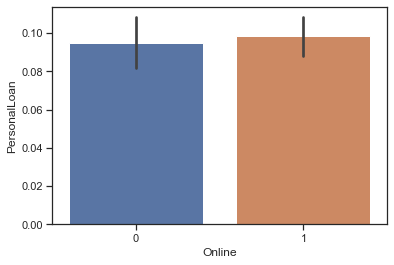

In [48]:
sns.barplot(x=data['Online'],y=data['PersonalLoan'])
plt.show()


The probabilty of taking a loan is slightly higher for online users.

# Exploring Credit Card

In [49]:
data['CreditCard'].describe()

count    4948.000000
mean        0.294058
std         0.455664
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CreditCard, dtype: float64

In [50]:
data['CreditCard'].value_counts()

0    3493
1    1455
Name: CreditCard, dtype: int64

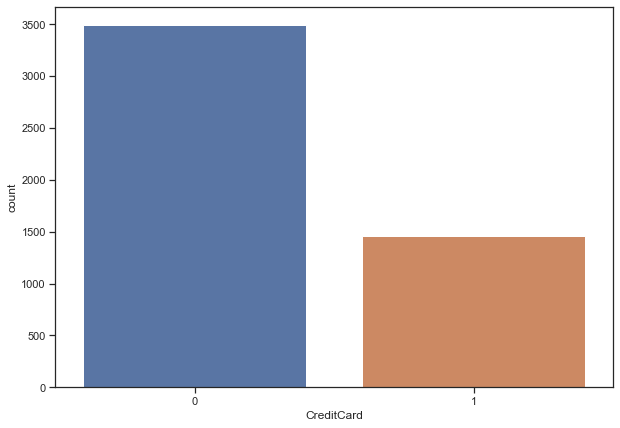

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(data['CreditCard'])
plt.show()

In [52]:
pd.crosstab(index=data['CreditCard'],columns=data['PersonalLoan'])

PersonalLoan,0,1
CreditCard,,
0,3156,337
1,1312,143


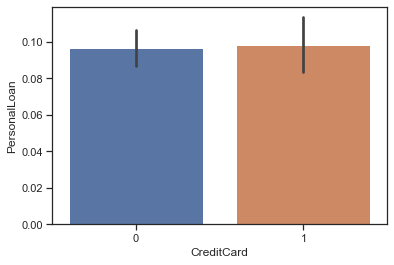

In [53]:
sns.barplot(x=data['CreditCard'],y=data['PersonalLoan'])
plt.show()


The probability of a person taking a loan if he has a credit card is almost the same as if the person does not have a credit card

# Exploring the target column Personal loan

In [54]:
data['PersonalLoan'].value_counts()

0    4468
1     480
Name: PersonalLoan, dtype: int64

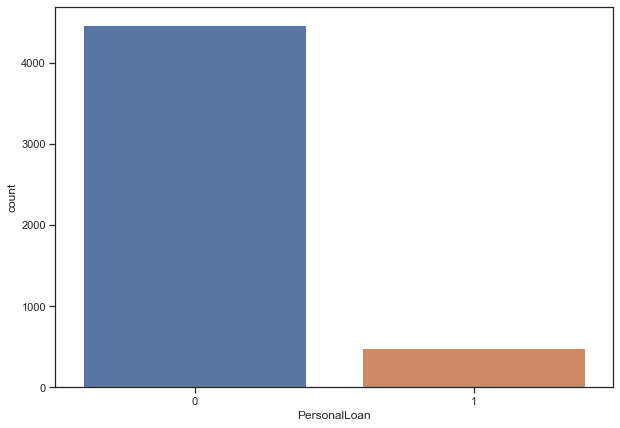

In [61]:
plt.figure(figsize=(10,7))
sns.countplot(data['PersonalLoan'])



It can be seen that the distribution of Our target column is imbalanced. Imbalanced datasets can lead to the creation of biased models. The models trained on imbalanced datsets get overtrained on the majority class and can lead to biased predictions. So we can oversample the dataset to balance the classes.

### Synthetic Minority Oversampling Technique (SMOTE) is an oversampling technique which creates new data points artifically to increase the number of minority class data points.

In [58]:
from imblearn.over_sampling import SMOTE

In [63]:
#Separating the predictors and Targets
X = data.drop(labels=['PersonalLoan','ID'],axis=1)
y = data['PersonalLoan']

### Separating the dataset into train and test sets with 70% for training and 30% for testing.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X_train.shape,y_train.shape,y_test.shape,X_test.shape

((3463, 12), (3463,), (1485,), (1485, 12))

### We can oversample the training data so that the model learns from balanced data. But the test set represents unseen data which the model might not have seen before and would be imbalanced. We want our model to perform well on imbalanced datasets as well. So we do not oversample the test data.

In [67]:
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)

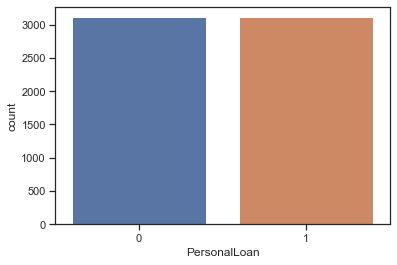

In [68]:
sns.countplot(y_train)

Now the dataset is balanced for training.

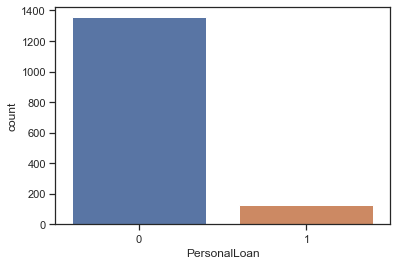

In [69]:
#Distribution of the target class in the test data.
sns.countplot(y_test)


# Creating various predicitve models


# Logistic regression model

In [70]:
model = LogisticRegression(C=100)

In [71]:
model.fit(X_train,y_train)

LogisticRegression(C=100)

In [72]:
pred = model.predict(X_test)

In [73]:
# Importing confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1165,191
Actual 1,15,114


In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1356
           1       0.37      0.88      0.53       129

    accuracy                           0.86      1485
   macro avg       0.68      0.87      0.72      1485
weighted avg       0.93      0.86      0.88      1485



### We can also look at the ROC and AUC score to look at the distinguishing ability of the model. A model with a higher AUC score has better ability to distinguish between the 2 classes.

In [76]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,pred))

0.8714327365027097


For the given dataset we can see that the Logistic Regression model performs well and achieves an overall accuracy of 91% with a 91% recall for the 0 class and a 85% of recall for the 1 class.

### K-Nearest Neighbors Classification

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### As KNN works based on distance formula we have to standardize the data before using them in the model. The different variables are measured on different scales and calculating the distance between variables of different scales of measurement might be misleading. Standardization brings all the variables to the same scale

In [84]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [85]:
model = KNeighborsClassifier()

In [86]:
model.fit(scaler.fit_transform(X_train),y_train)

KNeighborsClassifier()

In [87]:
pred = model.predict(scaler.fit_transform(X_test))

In [88]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1033,323
Actual 1,2,127


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1356
           1       0.28      0.98      0.44       129

    accuracy                           0.78      1485
   macro avg       0.64      0.87      0.65      1485
weighted avg       0.94      0.78      0.83      1485



In [90]:
print(roc_auc_score(y_test,pred))

0.8731477670302531


The KNN model with K=5 is able to achieve an accuracy score of 81%. The best aspect of this model is that it is able to almost predict all of the loan applicants successfully. But the recall of non applicants is low and the precision is also low for class 1.

### Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [92]:
pred = model.predict(X_test)

In [93]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1213,143
Actual 1,25,104


In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94      1356
           1       0.42      0.81      0.55       129

    accuracy                           0.89      1485
   macro avg       0.70      0.85      0.74      1485
weighted avg       0.93      0.89      0.90      1485



In [95]:
print(roc_auc_score(y_test,pred))

0.850372161624477


The Naive Bayes model achieved an overall accuracy of 89%. The sensitivity (True Positive Rate) - Recall of class 1 and Specificity (True Negative Rate) - Recall of Class 0 are 90% and 81% respectively. Naive bayes provides a balanced classification with good performance on both classes. However, we are interested in reducing the number of False positives, ie. the number of people who did not actually apply for a loan but predicted as applied. The management wants to identify all the liable customers and develop a campaign targeted at the people who will not apply for loans.

# conclusion 

The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Three classification algorithms were used in this study. From the above graph , it seems like Logistic Regression algorithm have the highest accuracy and we can choose that as our final model